## Imports

In [1]:
import cv2
import io
import sys

sys.path.append('..')
import main

sys.path.append('../models')
import book_functions

import matplotlib.pyplot as plt
%matplotlib inline



# Google cloud
from google.cloud import vision
from google.cloud.vision import types

## Get image tokenization

In [4]:
img_path = main.SHELFY_BASE_PATH + '/data/shelves/insight_8/insight_8.jpg'

# Instantiates a google vision API client
client = vision.ImageAnnotatorClient()

# Loads the image into memory
with io.open(img_path, 'rb') as img_file:
    content = img_file.read()
img_bin = types.Image(content=content)

img = cv2.imread(img_path)[:,:,::-1]




# Query the image on google cloud vision API
response = client.document_text_detection(image=img_bin)
texts = response.text_annotations

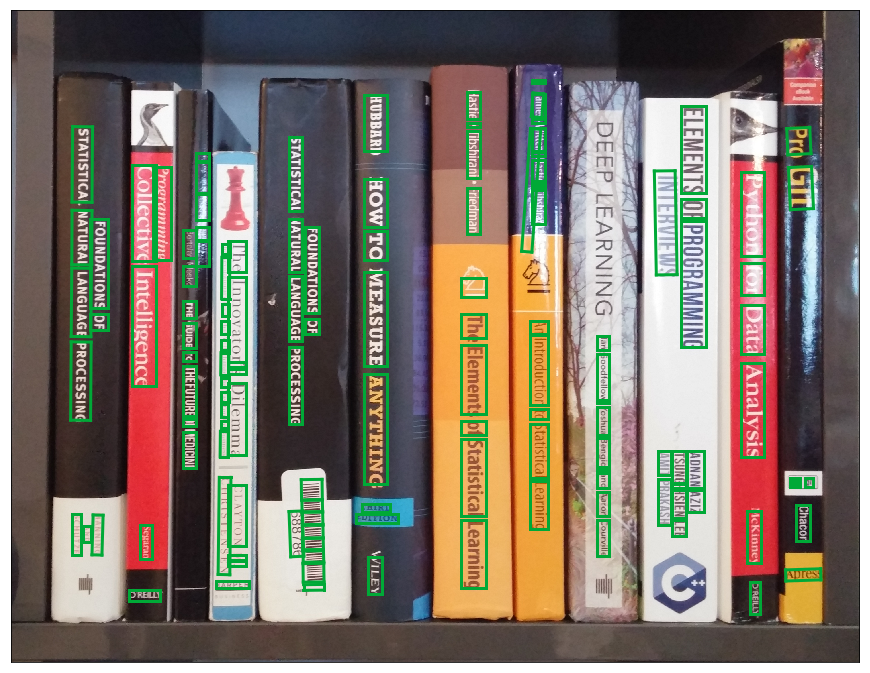

In [5]:
fig = plt.figure(figsize = (16,12))
book_functions.plot_annotated_image_google(img, texts[1:], show = False)



plt.xticks([])
plt.yticks([])


plt.savefig('google_boxes.png', dpi = 300)
plt.show()